# POTFOLIO 4___ STROKE PREDICTION


In this portfolio, I will work on the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).
Stroke is the second leading cause of death worldwide according to the World Health Organization (WHO), responsible for approximately 11% of total deaths.

This dataset is utilized to predict the likelihood of a patient experiencing a stroke based on input parameters such as gender, age, various medical conditions, and smoking status.
Each row in the data represents information from each patient's condition.

**Data Column Information**
1. id: unique identification
2. gender: "Male", "Female", or "Other"
3. age: patient's age
4. hypertension: 0 if the patient does not have a history of hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient does not have heart disease, 1 if the patient has heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_job", "Never_worked", "Private", or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes", or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in 'smoking_status' means information is not available for that patient

# purposes to the analysis:
The analysis of the Stroke Prediction dataset aims to comprehensively explore demographic characteristics, risk factors, and predictive modeling for stroke incidence. Through demographic analysis, we seek to understand the distribution of stroke cases across various groups such as gender, age, marital status, work type, and residence type, identifying any disparities in stroke prevalence. Concurrently, we aim to identify significant risk factors associated with stroke, including hypertension, heart disease, average glucose level, BMI, and smoking status, while assessing correlations and patterns among these variables. 

Utilizing predictive modeling techniques, we endeavor to develop accurate models to predict stroke risk, comparing performance metrics of different machine learning algorithms. Furthermore, we delve into feature importance analysis to discern which variables contribute most significantly to stroke prediction. Additionally, we investigate the impact of smoking behavior, BMI, glucose level, marital status, and work type on stroke incidence, shedding light on potential associations and risk factors. Through this holistic approach, we aim to gain insights into the multifaceted nature of stroke risk and inform preventive strategies and clinical interventions.

# Importing Libraries: 
   We start by importing the necessary libraries for our data analysis and machine learning tasks.


In [56]:
#importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Exploration

In [57]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [58]:
# Display the number of Null values in each column
print("Null values in each column:")
print(stroke_data.isnull().sum())

Null values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [63]:
# Drop rows with missing values in the 'bmi' column
stroke_data= stroke_data.dropna(subset=['bmi'])

In [65]:
 # Remove id as it is not necessary and make data complex to understand
stroke_data.drop(columns=['id'], inplace=True)

/var/folders/rz/w7vxs4_d623b1571mmy267tc0000gn/T/ipykernel_52190/2103115410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data.drop(columns=['id'], inplace=True)


In [66]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [67]:
# Calculate descriptive statistics
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Univariate Analysis:
we will generate histograms for numerical variables and count plots for categorical variables, providing insights into the distribution and frequency of each variable in the dataset. 

We can visualize the distribution of age, average glucose level, and BMI using histograms, while exploring the frequency of categorical variables such as gender, hypertension, heart disease, etc., using count plots. This univariate analysis helps in understanding the characteristics of individual variables in the dataset.

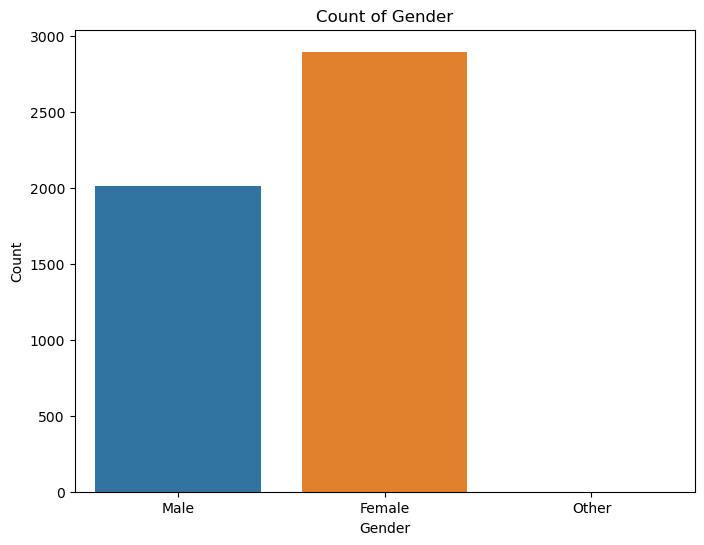

In [68]:
# Count plot for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=stroke_data)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [29]:
# Fixing class imbalance of gender
stroke_data = stroke_data[stroke_data.gender != 'Other']

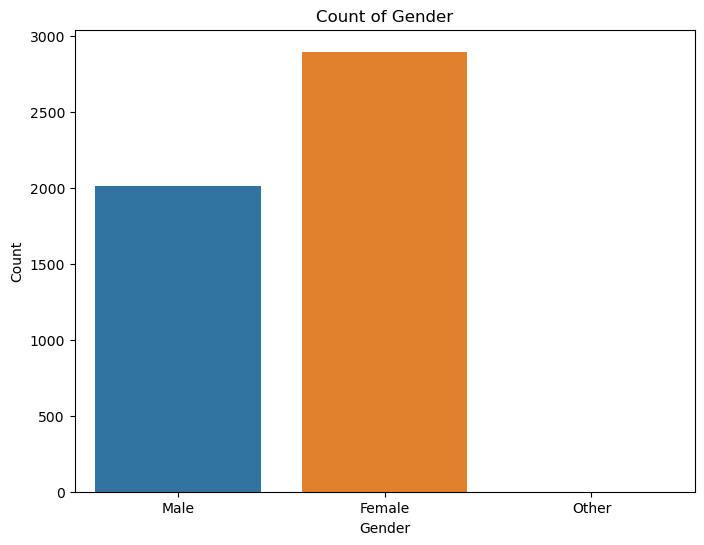

In [69]:
# Count plot for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=stroke_data)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

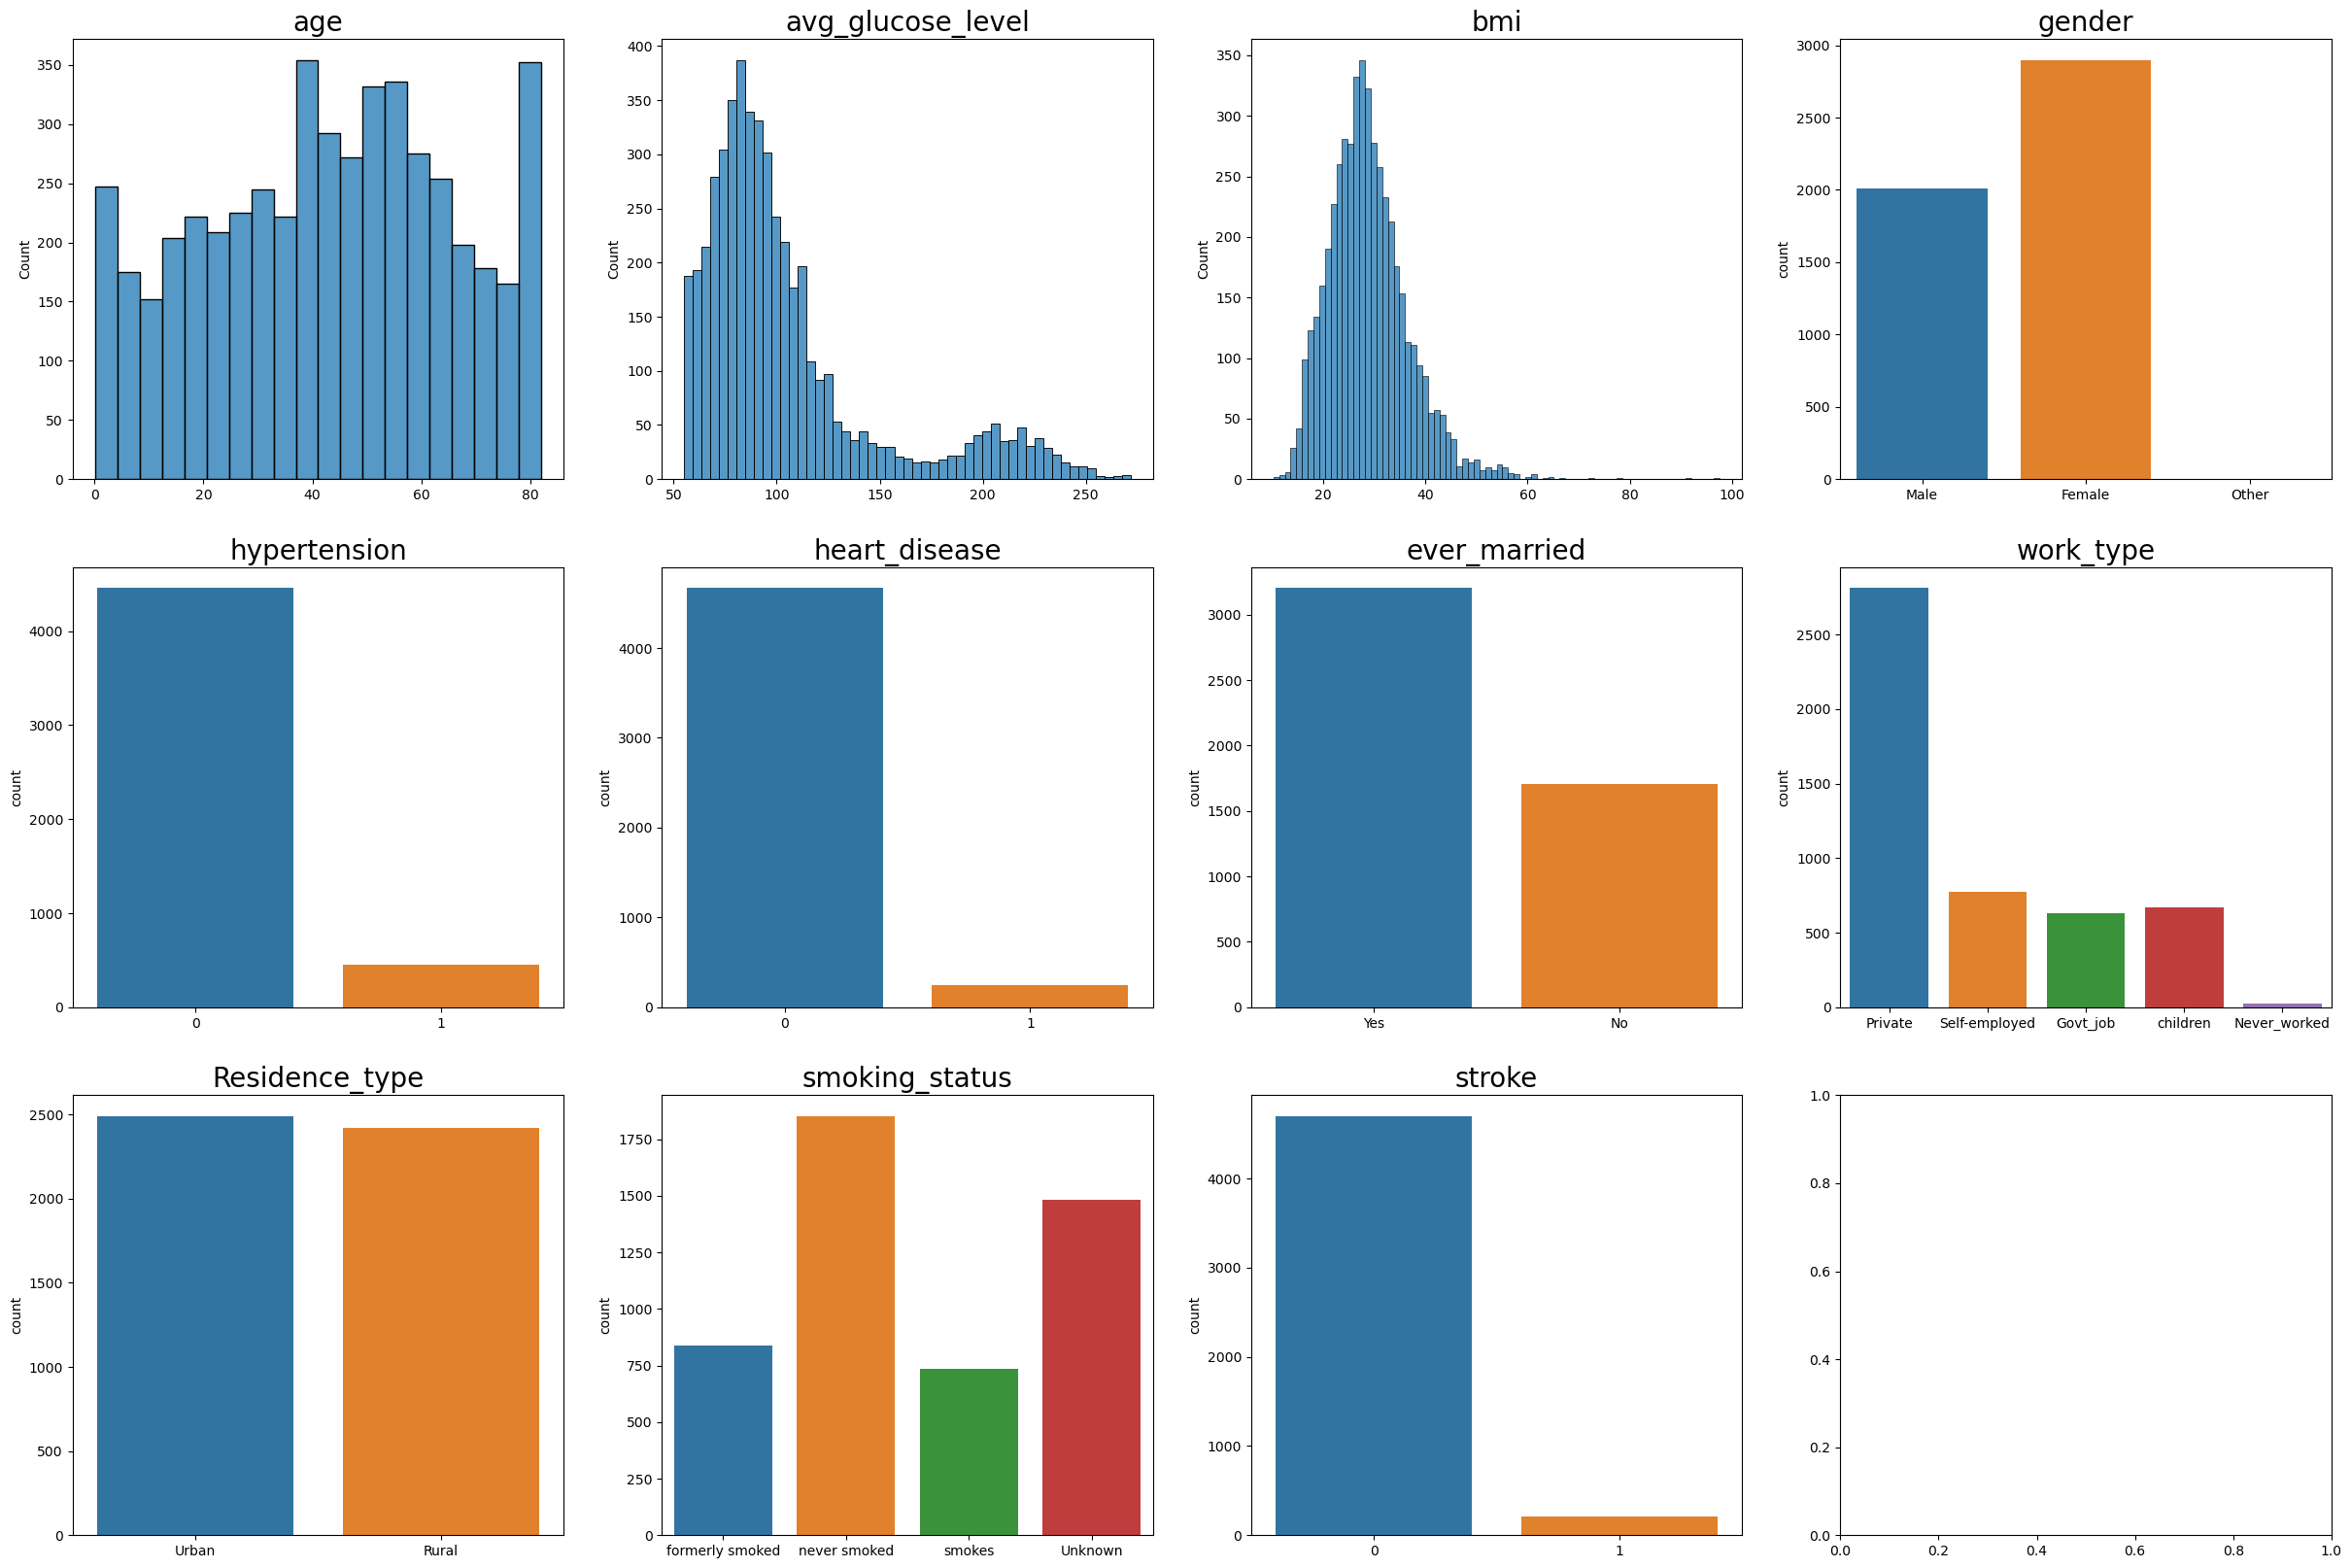

In [71]:
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(30, 20)

features = ['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease',
            'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    if feature in numerical_features:
        hist = sns.histplot(data=stroke_data, x=feature, ax=ax[row, col]) 
    else:
        hist = sns.countplot(data=stroke_data, x=feature, ax=ax[row, col])
    hist.set_title(feature, fontsize=20)
    hist.set_xlabel('')
    
plt.show()


# Mean Stroke occurance by different variables:
The purpose of this analysis is to explore the relationship between age,Average glucose level , bmi and stroke occurrence.These analyses will help us  understand how stroke occurrence varies with average glucose level and BMI,  age. By grouping the data into smaller intervals and calculating the mean stroke occurrence for each interval, we  can observe any patterns or trends in stroke prevalence across different levels of glucose and BMI.

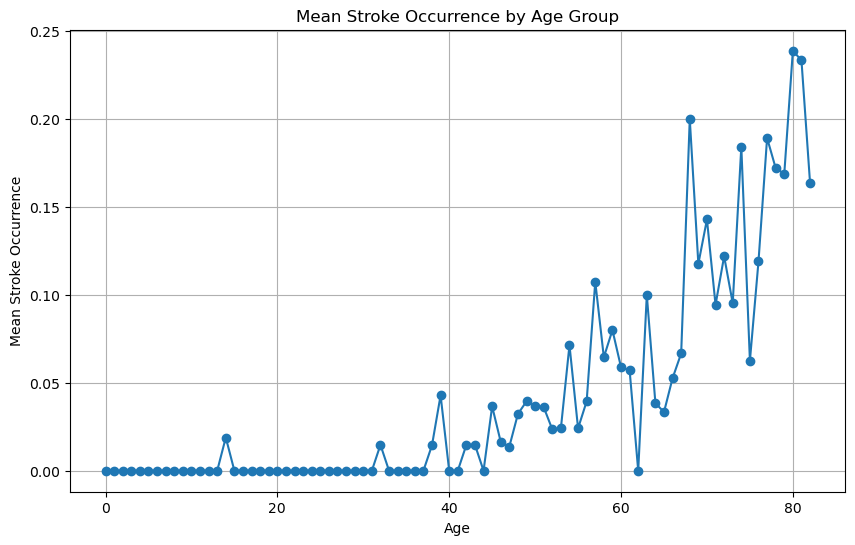

In [72]:
# Determine feature range
feature_min = np.min(stroke_data['age'])
feature_max = np.max(stroke_data['age'])

# Initialize arrays for group values and mean stroke occurrence
group_values = np.arange(round(feature_min), round(feature_max) + 1)
group_mean = np.zeros_like(group_values, dtype=float)

# Calculate mean stroke occurrence for each group
for i, val in enumerate(group_values):
    group_data = stroke_data[(stroke_data['age'] >= val - 0.5) & (stroke_data['age'] < val + 0.5)]
    group_mean[i] = np.mean(group_data['stroke'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(group_values, group_mean, marker='o', linestyle='-')
plt.title('Mean Stroke Occurrence by Age Group')
plt.xlabel('Age')
plt.ylabel('Mean Stroke Occurrence')
plt.grid(True)
plt.show()

# Average_glucose level and stroke

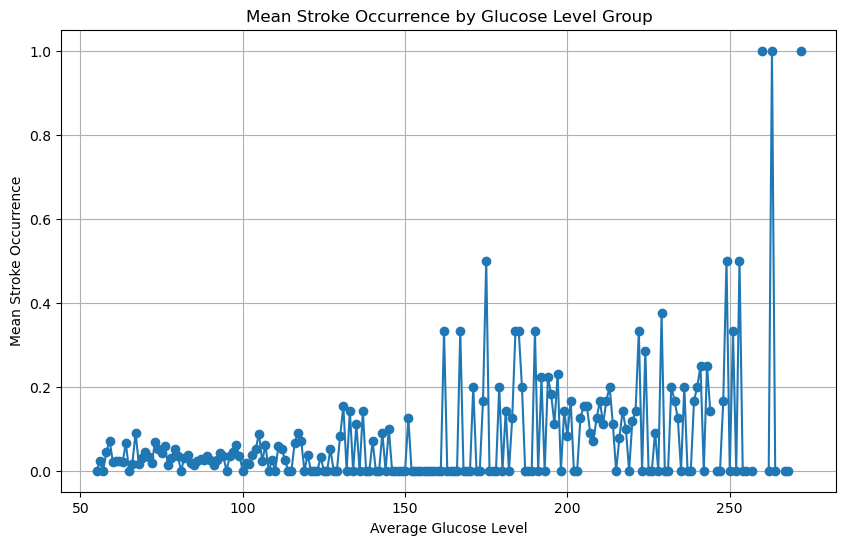

In [73]:
# Determine feature range
glucose_min = np.min(stroke_data['avg_glucose_level'])
glucose_max = np.max(stroke_data['avg_glucose_level'])

# Initialize arrays for group values and mean stroke occurrence
glucose_group_values = np.arange(round(glucose_min), round(glucose_max) + 1)
glucose_group_mean = np.zeros_like(glucose_group_values, dtype=float)

# Calculate mean stroke occurrence for each group
for i, val in enumerate(glucose_group_values):
    group_data = stroke_data[(stroke_data['avg_glucose_level'] >= val - 0.5) & (stroke_data['avg_glucose_level'] < val + 0.5)]
    glucose_group_mean[i] = np.mean(group_data['stroke'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(glucose_group_values, glucose_group_mean, marker='o', linestyle='-')
plt.title('Mean Stroke Occurrence by Glucose Level Group')
plt.xlabel('Average Glucose Level')
plt.ylabel('Mean Stroke Occurrence')
plt.grid(True)
plt.show()


# BMI and stroke:

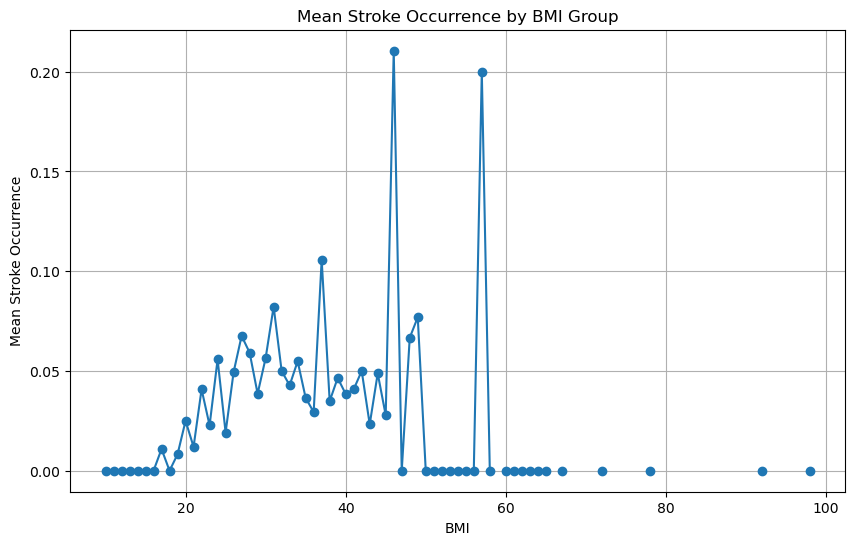

In [74]:
# Determine feature range
bmi_min = np.min(stroke_data['bmi'])
bmi_max = np.max(stroke_data['bmi'])

# Initialize arrays for group values and mean stroke occurrence
bmi_group_values = np.arange(round(bmi_min), round(bmi_max) + 1)
bmi_group_mean = np.zeros_like(bmi_group_values, dtype=float)

# Calculate mean stroke occurrence for each group
for i, val in enumerate(bmi_group_values):
    group_data = stroke_data[(stroke_data['bmi'] >= val - 0.5) & (stroke_data['bmi'] < val + 0.5)]
    bmi_group_mean[i] = np.mean(group_data['stroke'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bmi_group_values, bmi_group_mean, marker='o', linestyle='-')
plt.title('Mean Stroke Occurrence by BMI Group')
plt.xlabel('BMI')
plt.ylabel('Mean Stroke Occurrence')
plt.grid(True)
plt.show()


# Insights from the plots between BMI, AVERAGE GLUCOSE LEVEL AND AGE:

* You can see that the probability of a stroke increases with age. Up to the age of 30, however, the risk of a stroke is very low.

* The higher the glucose level, the more likely a stroke is.

* Even if the sample is somewhat small and no clear pattern can be recognized, it can still be seen from the graph that a higher BMI is more likely to lead to a stroke than a lower one.

# Bivariate analysis

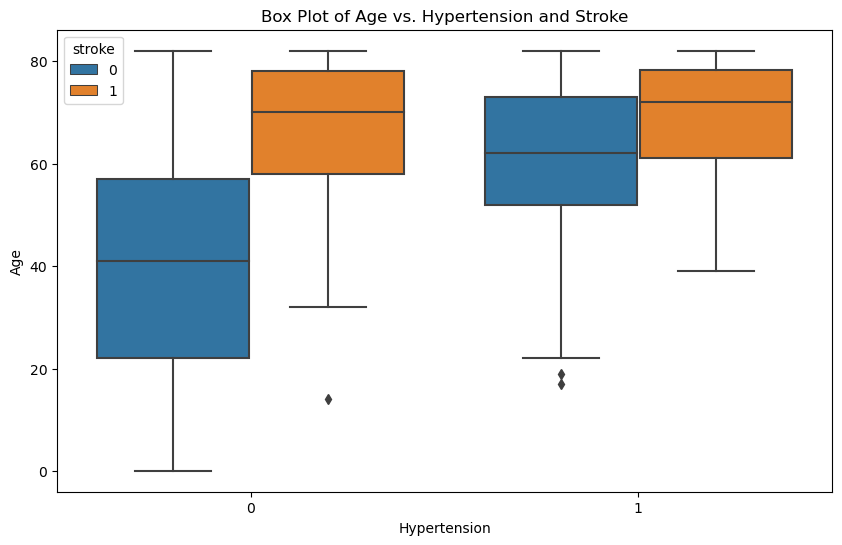

In [75]:
# Box plot of age vs. hypertension and stroke
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='age', hue='stroke', data=stroke_data)
plt.title('Box Plot of Age vs. Hypertension and Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()



* people with age greater than 40 and having hypertension have high chnaces of stroke.

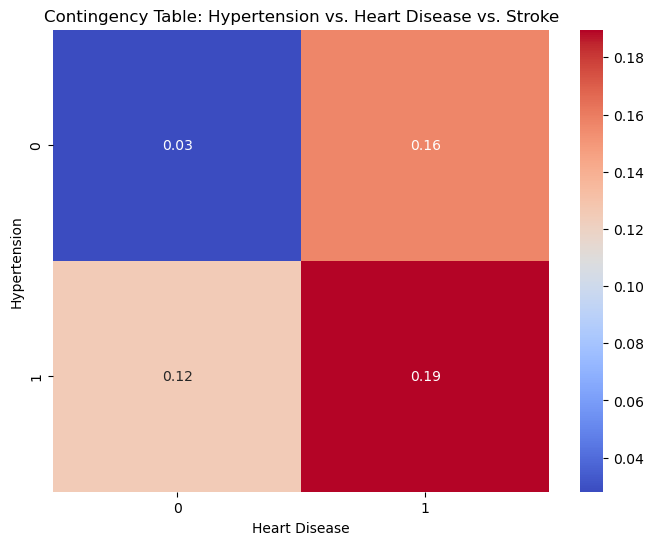

In [76]:
# Create a contingency table
contingency_table = pd.crosstab(index=stroke_data['hypertension'], columns=stroke_data['heart_disease'], values=stroke_data['stroke'], aggfunc='mean')

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Contingency Table: Hypertension vs. Heart Disease vs. Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Hypertension')
plt.show()


* people with hypertension and heart diseases have high chances of stroke

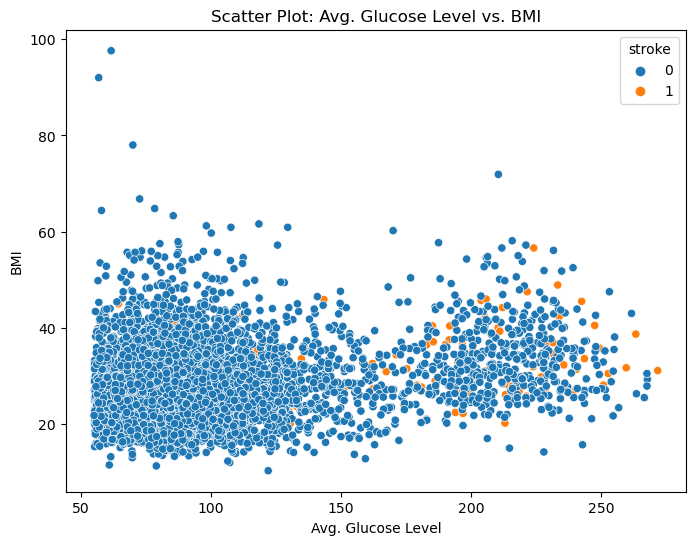

In [77]:
# Scatter plot of avg_glucose_level vs. bmi, colored by stroke
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=stroke_data)
plt.title('Scatter Plot: Avg. Glucose Level vs. BMI')
plt.xlabel('Avg. Glucose Level')
plt.ylabel('BMI')
plt.show()


* people with high average glucose level have high chances of stroke

In [78]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
stroke_data.loc[:, 'gender'] = ordinal_encoder.fit_transform(stroke_data[['gender']])
stroke_data.loc[:, 'ever_married'] = ordinal_encoder.fit_transform(stroke_data[['ever_married']])
stroke_data.loc[:, 'work_type'] = ordinal_encoder.fit_transform(stroke_data[['work_type']])
stroke_data.loc[:, 'Residence_type'] = ordinal_encoder.fit_transform(stroke_data[['Residence_type']])
stroke_data.loc[:, 'smoking_status'] = ordinal_encoder.fit_transform(stroke_data[['smoking_status']])

# Display the transformed DataFrame
stroke_data.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1


<Axes: >

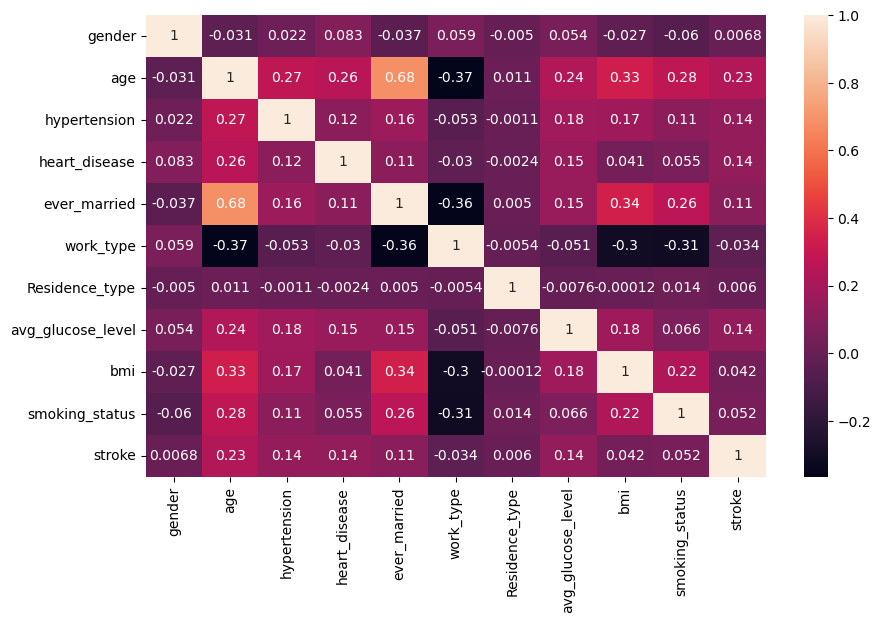

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(stroke_data.corr(),annot=True)

### The relevant variables for stroke prediction include age, high blood pressure,avg_glucose_level and heart disease.

# Modeling
## Regression Model:
A regression model for stroke prediction utilizes statistical techniques to quantify the relationship between multiple health-related variables (such as age, blood pressure,heart_disease,avg_glucose_level , etc.) and the likelihood of experiencing a stroke.

By analyzing historical data on individuals who have and haven't experienced strokes, the model learns patterns and correlations, enabling it to make predictions about stroke risk for new individuals based on their health profile. This predictive capability aids healthcare professionals in identifying high-risk patients and implementing preventive strategies to reduce the incidence of strokes.




In [110]:
#importing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


In [111]:
# Step 1: Prepare the data
X = stroke_data[['age', 'hypertension', 'heart_disease','avg_glucose_level']]  # Features
y = stroke_data['stroke']  # Target variable

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
# Step 2: Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)


## Performance Matrics:

These performance metrics indicate the effectiveness of the regression model:

**Mean Squared Error (MSE)**: The average squared difference between the predicted stroke probabilities and the actual values is 0.04697. Lower values indicate better accuracy.

**Mean Absolute Error (MAE)**: The average absolute difference between the predicted stroke probabilities and the actual values is 0.09222. Again, lower values are preferable.

**R-squared (r2)**: This value, 0.08004, represents the proportion of variance in the stroke occurrence that is predictable from the independent variables (health factors) used in the model. Higher values closer to 1 indicate a better fit of the model to the data, but 0.08 suggests that the model explains only a small portion of the variance in stroke occurrence.

In [114]:
# Predict the target variable using test features
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (r2)
r2 = r2_score(y_test, y_pred)
print("R-squared (r2):", r2)

Mean Squared Error (MSE): 0.0469715994140791
Mean Absolute Error (MAE): 0.09222391602541687
R-squared (r2): 0.08004466898100149


## Polynomial Regression:
Polynomial regression is a form of regression analysis that models the relationship between the independent variable(s) and the dependent variable as an nth degree polynomial. It allows for more complex relationships to be captured compared to linear regression, enabling the model to fit curves to the data.

This technique is useful when the relationship between variables is not linear and can provide a better fit to the data. However, higher-degree polynomials can lead to overfitting if not carefully controlled through techniques like regularization.

In [137]:
# Polynomial Regression
poly_degree = 2  # Degree of polynomial features

# Perform feature engineering to create polynomial features
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
poly_reg_model = LinearRegression()

# Fit the model on the polynomial features
poly_reg_model.fit(X_train_poly, y_train)

# Predict the target variable using test polynomial features
y_pred_poly = poly_reg_model.predict(X_test_poly)



## Performance Matrices:
**Mean Squared Error (MSE)**: The average squared difference between the predicted stroke probabilities and the actual values is 0.04689. It's slightly lower than the previous MSE, suggesting a slightly better fit of the polynomial regression model.

**Mean Absolute Error (MAE)**: The average absolute difference between the predicted stroke probabilities and the actual values is 0.08433. It's lower than the previous MAE, indicating a slightly better accuracy of the polynomial regression model.

**R-squared (r2)**: This value, 0.08169, represents the proportion of variance in the stroke occurrence that is predictable from the independent variables (health factors) used in the polynomial regression model. It's slightly higher than the previous r2, suggesting a slightly better fit of the polynomial regression model to the data. However, it's still relatively low, indicating that the model explains only a small portion of the variance in stroke occurrence.

In [138]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

# Calculate Mean Absolute Error (MAE) for polynomial regression
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Mean Absolute Error (MAE) for Polynomial Regression:", mae_poly)

# Calculate R-squared (r2) for polynomial regression
r2_poly = r2_score(y_test, y_pred_poly)
print("R-squared (r2) for Polynomial Regression:", r2_poly)

Mean Squared Error (Polynomial Regression): 0.046887540452809115
Mean Absolute Error (MAE) for Polynomial Regression: 0.08433279172114963
R-squared (r2) for Polynomial Regression: 0.08169099336647823


## Recursive Feature Elimination
"RFE" typically stands for Recursive Feature Elimination, a feature selection technique commonly used in machine learning. In RFE, the model iteratively trains on subsets of features and ranks them based on their importance or contribution to the model's performance.

Features are then either removed or kept based on their ranking until the optimal subset of features is selected. RFE helps to improve model efficiency, reduce overfitting, and identify the most relevant features for prediction or classification tasks.

In [139]:
# RFE
num_features_to_select = 2  # Number of features to select

# Initialize an estimator (Linear Regression)
estimator = LinearRegression()

# Initialize RFE with the estimator and the number of features to select
rfe = RFE(estimator=estimator, n_features_to_select=num_features_to_select)

# Fit RFE on the entire dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
X_selected = X[selected_features]

# Split the data into training and testing sets using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit a linear regression model using only the selected features
linear_reg_model_selected = LinearRegression()
linear_reg_model_selected.fit(X_train_selected, y_train)

# Predict the target variable using the test data with selected features
y_pred_selected = linear_reg_model_selected.predict(X_test_selected)



# Evaluation Matrics:
**Mean Squared Error (MSE)**: The average squared difference between the predicted stroke probabilities and the actual values is 0.04873. It's slightly higher than the previous MSE values, suggesting a slightly worse fit compared to the polynomial regression model.

**Mean Absolute Error (MAE)**: The average absolute difference between the predicted stroke probabilities and the actual values is 0.08610. It's slightly higher than the previous MAE values, indicating a slightly worse accuracy compared to the polynomial regression model.

**R-squared (r2)**: This value, 0.04552, represents the proportion of variance in the stroke occurrence that is predictable from the selected features using RFE. It's lower than the previous r2 values, suggesting that the linear regression model with selected features explains a smaller portion of the variance in stroke occurrence compared to the polynomial regression model.

In [140]:
# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
print("Mean Squared Error (Linear Regression with Selected Features):", mse_selected)

# Calculate Mean Absolute Error (MAE) for RFE
mae_rfe = mean_absolute_error(y_test, y_pred_selected)
print("Mean Absolute Error (MAE) for RFE:", mae_rfe)

# Calculate R-squared (r2) for RFE
r2_rfe = r2_score(y_test, y_pred_selected)
print("R-squared (r2) for RFE:", r2_rfe)

Mean Squared Error (Linear Regression with Selected Features): 0.04873435942780202
Mean Absolute Error (MAE) for RFE: 0.08609927025205047
R-squared (r2) for RFE: 0.045520392776656426


## Comparison of all the Evaluation Matrics:
Both Linear and Polynomial Regression models perform similarly in terms of MSE and R-squared, with Polynomial Regression slightly outperforming Linear Regression in terms of MAE.

Linear Regression with Selected Features using RFE performs slightly worse in terms of MSE, MAE, and R-squared compared to both Linear and Polynomial Regression models.

Overall, Polynomial Regression seems to provide the best balance between MSE, MAE, and R-squared among the three models considered. However, the differences between the models are relatively small, suggesting that the choice of model may depend on other factors such as interpretability and computational complexity.

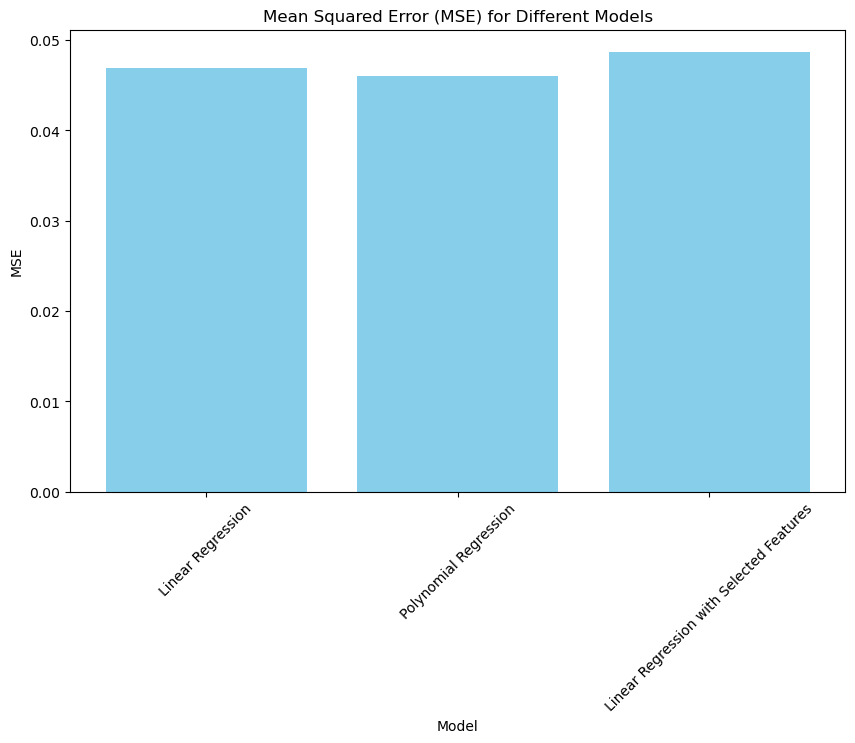

In [94]:
# Define lists to store MSE values
mse_values = []

# Calculate and store MSE for Linear Regression
mse_values.append(mse_linear)

# Calculate and store MSE for Polynomial Regression
mse_values.append(mse_poly)

# Calculate and store MSE for Linear Regression with Selected Features
mse_values.append(mse_selected)

# Model names
model_names = ['Linear Regression', 'Polynomial Regression', 'Linear Regression with Selected Features']

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

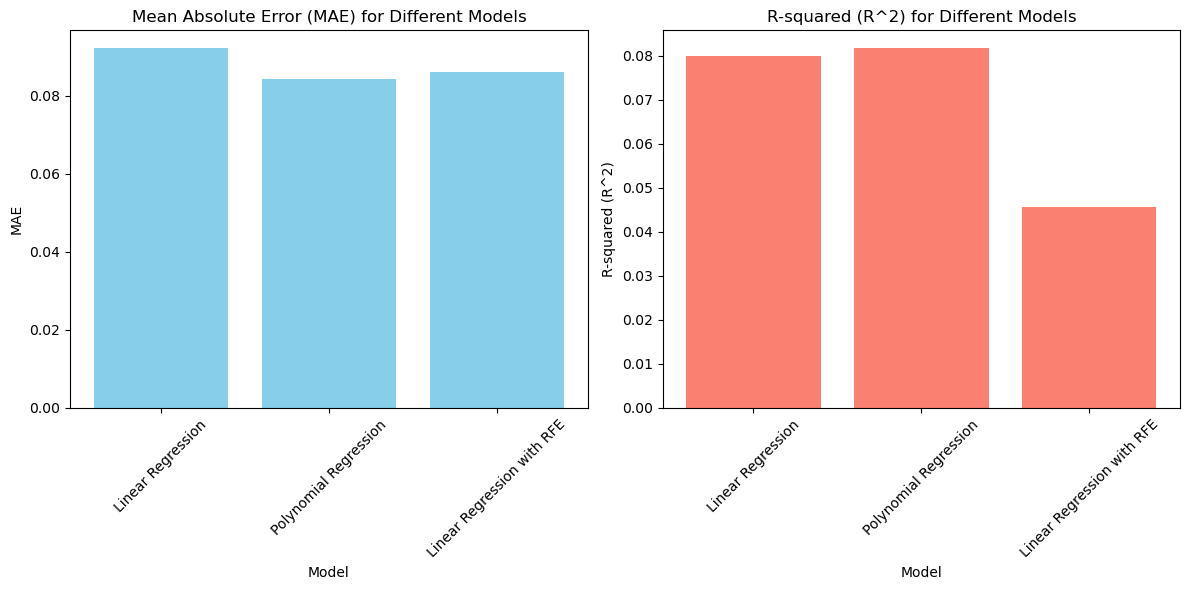

In [122]:
# Define lists to store MAE values and R-squared (R^2) values
mae_values = []
r2_values = []

# Calculate and store MAE for Linear Regression
mae_values.append(mae)
r2_values.append(r2)

# Calculate and store MAE for Polynomial Regression
mae_values.append(mae_poly)
r2_values.append(r2_poly)

# Calculate and store MAE for Linear Regression with Selected Features (RFE)
mae_values.append(mae_rfe)
r2_values.append(r2_rfe)

# Model names
model_names = ['Linear Regression', 'Polynomial Regression', 'Linear Regression with RFE']

# Plot the MAE values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(model_names, mae_values, color='skyblue')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# Plot the R-squared (R^2) values
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='salmon')
plt.title('R-squared (R^2) for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared (R^2)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Logistic regression:

Logistic regression for stroke prediction is a statistical method used to model the probability of stroke occurrence based on various predictor variables, such as age, blood pressure, etc. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability of a binary outcome (e.g., stroke or no stroke) by fitting the data to a logistic curve. 

The resulting model can estimate the likelihood of stroke for individuals based on their health profile, allowing for risk assessment and preventive measures. Model evaluation typically involves metrics like accuracy, precision, recall, and area under the receiver operating characteristic curve (ROC AUC).

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [145]:
#  Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

#  Predict on the test set
y_pred = logistic_model.predict(X_test)



Accuracy: 0.9460285132382892


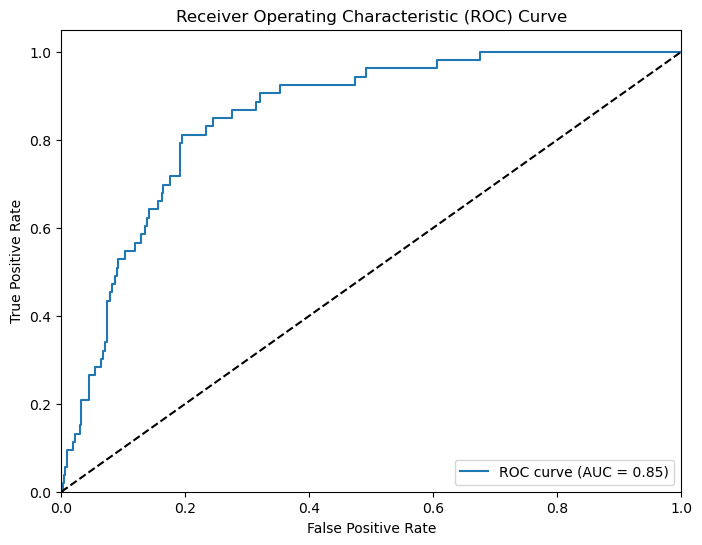

F1-score: 0.0
AUC: 0.8537685074232793


In [149]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Predict probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Predictions based on a threshold (you can adjust the threshold as needed)
y_pred = (y_prob > 0.5).astype(int)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("F1-score:", f1)
print("AUC:", auc)


# KNN Clasifier:

The k-Nearest Neighbors (kNN) classifier is a non-parametric algorithm used for classification and regression tasks. In the context of stroke prediction, the kNN classifier predicts whether an individual is at risk of experiencing a stroke based on the similarity of their health profile to that of other individuals in the dataset.

In [133]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = knn_model.predict(X_test)

# Step 5: Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)


Accuracy: 0.945010183299389


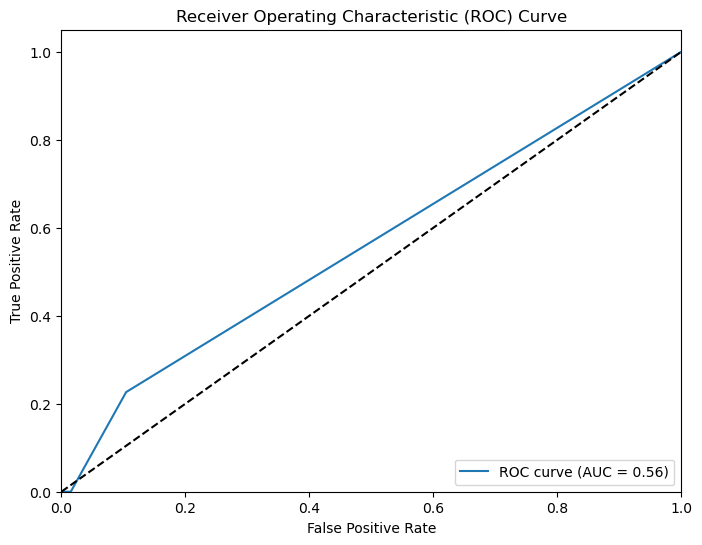

F1-score: 0.0
AUC: 0.5592948392469077


In [134]:
# Predict probabilities for the positive class
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Predictions based on a threshold (you can adjust the threshold as needed)
y_pred = (y_prob > 0.5).astype(int)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred)

# Calculate Area Under the ROC Curve (AUC)
auc_knn = roc_auc_score(y_test, y_prob)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("F1-score:", f1)
print("AUC:", auc)

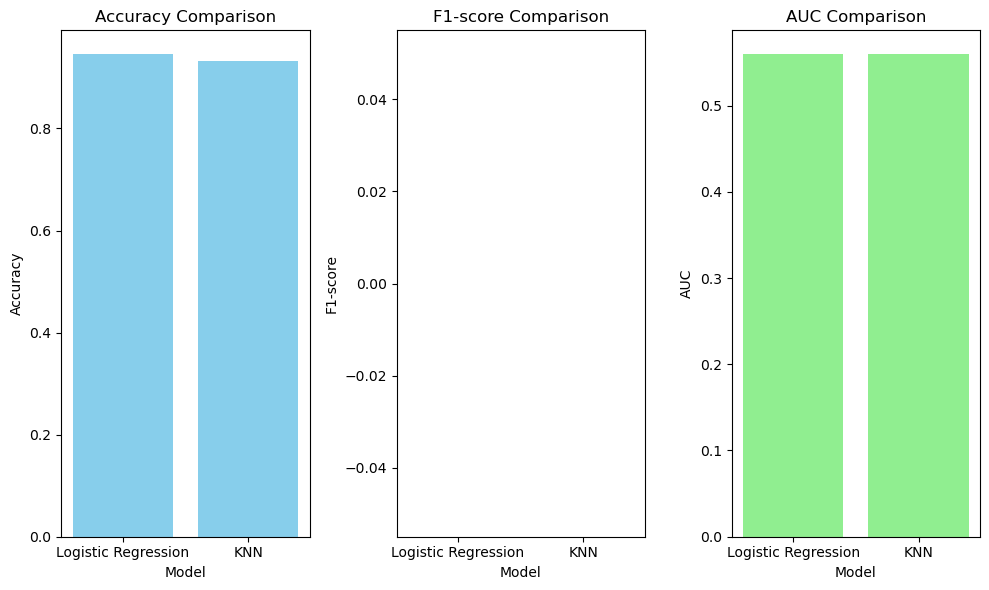

In [135]:
# Define lists to store metric values
accuracy_values = [accuracy, accuracy_knn]
f1_values = [f1, f1_knn]
auc_values = [auc, auc_knn]

# Model names
model_names = ['Logistic Regression', 'KNN']

# Plot the metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 3, 1)
plt.bar(model_names, accuracy_values, color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# F1-score
plt.subplot(1, 3, 2)
plt.bar(model_names, f1_values, color='salmon')
plt.title('F1-score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-score')

# AUC
plt.subplot(1, 3, 3)
plt.bar(model_names, auc_values, color='lightgreen')
plt.title('AUC Comparison')
plt.xlabel('Model')
plt.ylabel('AUC')

plt.tight_layout()
plt.show()

## GridSearchCV

GridSearchCV (Grid Search Cross-Validation) is a technique used for hyperparameter tuning in machine learning models. It systematically searches through a grid of hyperparameters, evaluating each combination using cross-validation to determine which combination yields the best performance.

In [136]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

print("Best value of k:", best_k)

# Use the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)


print("\nAccuracy (Best Model):", accuracy)



Best value of k: 11

Accuracy (Best Model): 0.945010183299389


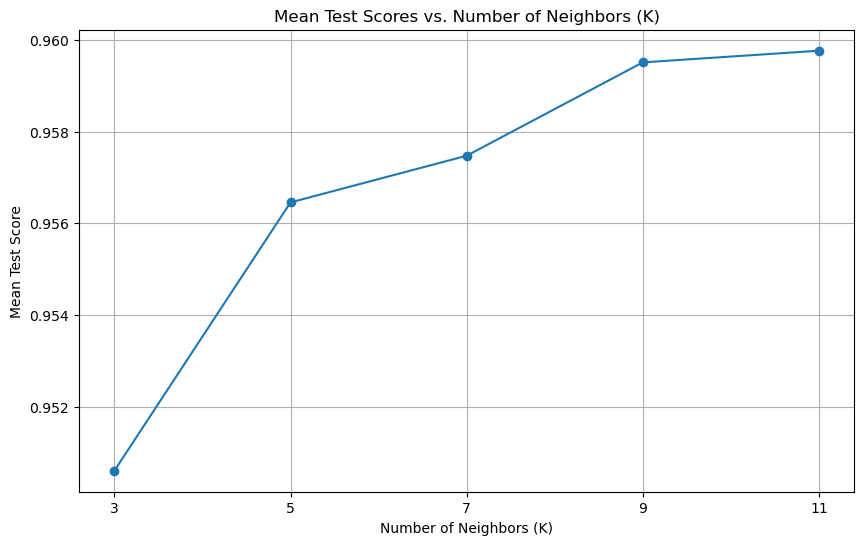

In [130]:
# Get the results of GridSearchCV
results = grid_search.cv_results_

# Extract the mean test scores and corresponding values of k
mean_test_scores = results['mean_test_score']
k_values = param_grid['n_neighbors']

# Plot the mean test scores for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()